In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('/content/drive/MyDrive/ibm/Projects/LinearRegression/insurance(LR).csv')

In [3]:
data.shape

(1338, 7)

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
columnname = data.columns.to_list()
observation_length = data.shape[0]
dummies = []
for x in columnname:
  if len(data[x].unique()) == observation_length:
    dummies.append(x)
print(dummies)

[]


# Exploratory data analysis

## Numerical Column Analysis

In [7]:
numerical_cols = data.select_dtypes('number').columns.tolist()
print(numerical_cols)

['age', 'bmi', 'children', 'charges']


## Charges

In [8]:
data['charges'].isnull().sum()

0

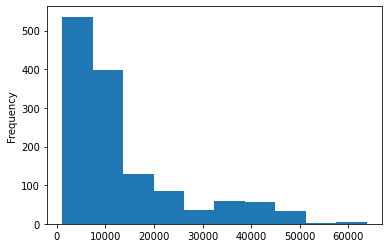

In [9]:
data['charges'].plot(kind = 'hist')

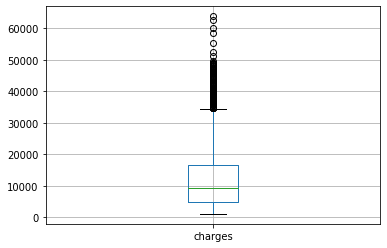

In [10]:
data.boxplot(column = 'charges')

In [11]:
dum = data[data['charges']>35000]
dum.head(),dum.shape[0]

(    age     sex    bmi  children smoker     region     charges
 14   27    male  42.13         0    yes  southeast  39611.7577
 19   30    male  35.30         0    yes  southwest  36837.4670
 23   34  female  31.92         1    yes  northeast  37701.8768
 29   31    male  36.30         2    yes  southwest  38711.0000
 30   22    male  35.60         0    yes  southwest  35585.5760, 133)

In [12]:
ct = pd.crosstab(index = dum['smoker'], columns = 'count')
display(ct)
dum[dum['bmi']>25].shape[0], dum['bmi'].min()

col_0,count
smoker,
no,3
yes,130


(132, 22.895)

In [13]:
bins = [float('-inf'),20.0,25.0,30.0,35.0,float('inf')]
labels = ['Underweight','Normal','Overweight','Obese','OverObese']
dum1 = dum.copy()
dum1['Bmi_range'] = pd.cut(dum['bmi'],bins = bins, labels = labels)
print(dum1)
ct = pd.crosstab(index = dum1['Bmi_range'], columns = 'count')
print(ct)

      age     sex     bmi  children smoker     region      charges   Bmi_range
14     27    male  42.130         0    yes  southeast  39611.75770   OverObese
19     30    male  35.300         0    yes  southwest  36837.46700   OverObese
23     34  female  31.920         1    yes  northeast  37701.87680       Obese
29     31    male  36.300         2    yes  southwest  38711.00000   OverObese
30     22    male  35.600         0    yes  southwest  35585.57600   OverObese
...   ...     ...     ...       ...    ...        ...          ...         ...
1300   45    male  30.360         0    yes  southeast  62592.87309       Obese
1301   62    male  30.875         3    yes  northwest  46718.16325       Obese
1303   43    male  27.800         0    yes  southwest  37829.72420  Overweight
1313   19  female  34.700         2    yes  southwest  36397.57600       Obese
1323   42  female  40.370         2    yes  southeast  43896.37630   OverObese

[133 rows x 8 columns]
col_0       count
Bmi_range 

## Age

In [14]:
data['age'].isnull().sum()

0

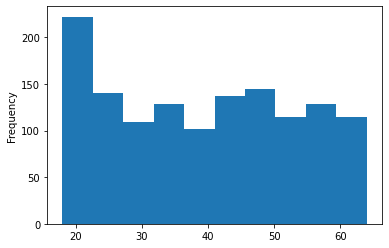

In [15]:
data['age'].plot(kind = 'hist')

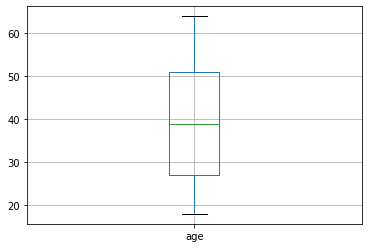

In [16]:
data.boxplot(column = 'age')

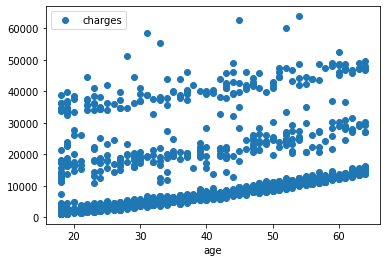

In [17]:
data.plot(x = 'age', y = 'charges', ls = '', marker = 'o')

In [18]:
bins = [0,20,40,60,80]
labels = ['0-20','20-40','40-60','60-80']
dummydata = data.copy()
dummydata['Age_range'] = pd.cut(dummydata['age'],bins = bins, labels = labels)
mean = dict()
dummydata1 = dummydata[dummydata['Age_range'] == '0-20']
mean['0-20'] = dummydata1['charges'].mean()
dummydata1 = dummydata[dummydata['Age_range'] == '20-40']
mean['20-40'] = dummydata1['charges'].mean()
dummydata1 = dummydata[dummydata['Age_range'] == '40-60']
mean['40-60'] = dummydata1['charges'].mean()
dummydata1 = dummydata[dummydata['Age_range'] == '60-80']
mean['60-80'] = dummydata1['charges'].mean()


In [19]:
print(pd.DataFrame(mean.items()))

       0             1
0   0-20   8713.482413
1  20-40  10686.686643
2  40-60  15888.757668
3  60-80  21063.163398


## bmi

In [20]:
data['bmi'].isnull().sum()

0

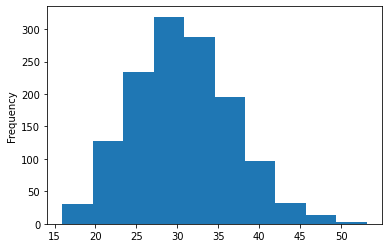

In [21]:
data['bmi'].plot(kind = 'hist')

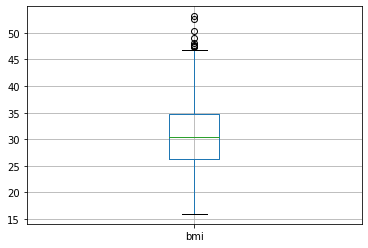

In [22]:
data.boxplot(column = 'bmi')

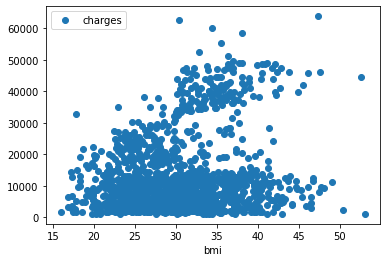

In [23]:
data.plot(x = 'bmi', y = 'charges', ls = '', marker = 'o')

In [24]:
bins = [float('-inf'),20.0,25.0,30.0,35.0,float('inf')]
labels = ['Underweight','Normal','Overweight','Obese','OverObese']
dum1 = data.copy()
dum1['Bmi_range'] = pd.cut(data['bmi'],bins = bins, labels = labels)
print(dum1)
ct = pd.crosstab(index = dum1['Bmi_range'], columns = 'count')
print(ct)

      age     sex     bmi  children smoker     region      charges   Bmi_range
0      19  female  27.900         0    yes  southwest  16884.92400  Overweight
1      18    male  33.770         1     no  southeast   1725.55230       Obese
2      28    male  33.000         3     no  southeast   4449.46200       Obese
3      33    male  22.705         0     no  northwest  21984.47061      Normal
4      32    male  28.880         0     no  northwest   3866.85520  Overweight
...   ...     ...     ...       ...    ...        ...          ...         ...
1333   50    male  30.970         3     no  northwest  10600.54830       Obese
1334   18  female  31.920         0     no  northeast   2205.98080       Obese
1335   18  female  36.850         0     no  southeast   1629.83350   OverObese
1336   21  female  25.800         0     no  southwest   2007.94500  Overweight
1337   61  female  29.070         0    yes  northwest  29141.36030  Overweight

[1338 rows x 8 columns]
col_0        count
Bmi_rang

## Children

In [25]:
data['children'].isnull().sum()

0

In [26]:
data['children'].unique()

array([0, 1, 3, 2, 5, 4])

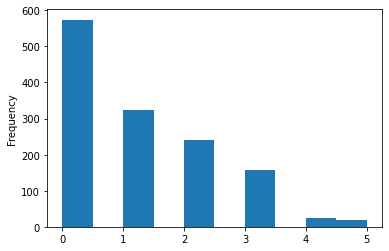

In [27]:
data['children'].plot(kind = 'hist')

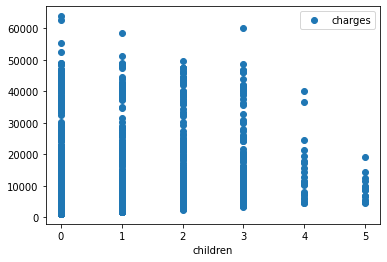

In [28]:
data.plot(x = 'children', y = 'charges', ls = '', marker = 'o')

In [74]:
ct = pd.crosstab(index = data['children'], columns = 'count')
print(ct)

col_0     count
children       
0           574
1           324
2           240
3           157
4            25
5            18


In [75]:

dummydata = data.copy()

mean = dict()
dummydata1 = dummydata[dummydata['children'] == 0]
mean['0'] = dummydata1['charges'].mean()
dummydata1 = dummydata[dummydata['children'] == 1]
mean['1'] = dummydata1['charges'].mean()
dummydata1 = dummydata[dummydata['children'] == 2]
mean['2'] = dummydata1['charges'].mean()
dummydata1 = dummydata[dummydata['children'] == 3]
mean['3'] = dummydata1['charges'].mean()
dummydata1 = dummydata[dummydata['children'] == 4]
mean['4'] = dummydata1['charges'].mean()
dummydata1 = dummydata[dummydata['children'] == 5]
mean['5'] = dummydata1['charges'].mean()
display(mean)

{'0': 12365.975601635882,
 '1': 12731.171831635793,
 '2': 15073.563733958328,
 '3': 15355.31836681528,
 '4': 13850.656311199999,
 '5': 8786.035247222222}

##Categorical column

In [29]:
categorical_cols = data.dtypes[data.dtypes == "object"].index
print(categorical_cols)


Index(['sex', 'smoker', 'region'], dtype='object')


### Sex 

In [30]:
data['sex'].isnull().sum()

0

In [31]:
data['sex'].unique()

array(['female', 'male'], dtype=object)

In [32]:
ct = pd.crosstab(index = data['sex'], columns = 'count')
ct


col_0,count
sex,
female,662
male,676


In [33]:
genderavg = dict()
dummydata = data[data['sex'] == 'female']
genderavg['female'] = dummydata['charges'].mean()
dummydata = data[data['sex'] == 'male']
genderavg['male'] = dummydata['charges'].mean()
print(pd.DataFrame(genderavg.items()))

        0             1
0  female  12569.578844
1    male  13956.751178


###smoker

In [34]:
data['smoker'].isnull().sum()

0

In [35]:
data['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [36]:
ct = pd.crosstab(index = data['smoker'], columns = 'count')
ct


col_0,count
smoker,
no,1064
yes,274


In [37]:
genderavg = dict()
dummydata = data[data['smoker'] == 'yes']
genderavg['Smoker'] = dummydata['charges'].mean()
dummydata = data[data['smoker'] == 'no']
genderavg['NotSmoker'] = dummydata['charges'].mean()
print(pd.DataFrame(genderavg.items()))

           0             1
0     Smoker  32050.231832
1  NotSmoker   8434.268298


### Region

In [38]:
data['region'].isnull().sum()

0

In [39]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [40]:
ct = pd.crosstab(index = data['region'], columns = 'count')
ct


col_0,count
region,
northeast,324
northwest,325
southeast,364
southwest,325


In [41]:
genderavg = dict()
dummydata = data[data['region'] == 'northeast']
genderavg['northeast'] = dummydata['charges'].mean()
dummydata = data[data['region'] == 'northwest']
genderavg['northwest'] = dummydata['charges'].mean()
dummydata = data[data['region'] == 'southeast']
genderavg['southeast'] = dummydata['charges'].mean()
dummydata = data[data['region'] == 'southwest']
genderavg['southwest'] = dummydata['charges'].mean()
print(pd.DataFrame(genderavg.items()))

           0             1
0  northeast  13406.384516
1  northwest  12417.575374
2  southeast  14735.411438
3  southwest  12346.937377


# Encoding

In [42]:
# Do the one hot encoding
data1 = data.copy()
data1 = pd.get_dummies(data1, columns=['sex','region','smoker'])
data1.head()

,age,bmi,children,charges,sex_female,sex_male,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,0,0,1,0,1
1,18,33.770,1,1725.55230,0,1,0,0,1,0,1,0
2,28,33.000,3,4449.46200,0,1,0,0,1,0,1,0
3,33,22.705,0,21984.47061,0,1,0,1,0,0,1,0
4,32,28.880,0,3866.85520,0,1,0,1,0,0,1,0


# Tranformation of target variable
Determining whether transforming the target variabe will improve the predictions

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [44]:
lr = LinearRegression()

In [45]:
y_col = "charges"

X = data1.drop(y_col, axis=1)
y = data1[y_col]

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=72018)

In [47]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [48]:
from scipy.stats import boxcox
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

In [49]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)
y_pred_bc = lr.predict(X_test_s)

In [50]:
from scipy.special import inv_boxcox
y_pred_tran = inv_boxcox(y_pred_bc,lam2)
r2_score(y_test, y_pred_tran)

0.47990628299448956

In [51]:
### BEGIN SOLUTION
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(y_test, lr_pred)
### END SOLUTION

0.7164012706034976

we will not apply boxcox transformation

# correlation matrix

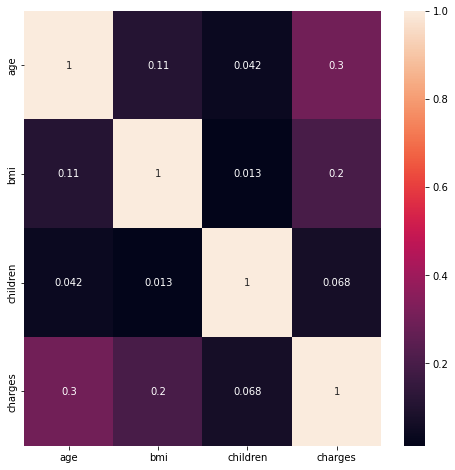

In [52]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8,8))
corr = data.corr()
sns.heatmap(corr, annot=True, ax = ax)


Interaction isnt strong so no interaction terms are added

# Vanilla Linear Regression

In [53]:
from sklearn.metrics import mean_squared_error


In [54]:
print(mean_squared_error(lr_pred, y_test))

37704801.58174754


In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
scalers = {'standars': StandardScaler(),
           'minmax': MinMaxScaler(),
           'robust':RobustScaler()}
LR = LinearRegression()
error = {}
r2_scores = {}
for scaler_label, scaler in scalers.items():
  trainingset = scaler.fit_transform(X_train)
  testset = scaler.transform(X_test)
  LR.fit(trainingset, y_train)
  predictions = LR.predict(testset)
  key = scaler_label + 'Scaling'
  error[key] = mean_squared_error(y_test, predictions)
  r2_scores[key] = r2_score(y_test, predictions)
error = pd.Series(error)
for key, val in error.items():
  print(key, val)
for key, val in r2_scores.items():
  print(key, val)

standarsScaling 37704801.58174754
minmaxScaling 37827235.04227932
robustScaling 37827235.042279325
standarsScaling 0.7164012706034976
minmaxScaling 0.7154803806270009
robustScaling 0.7154803806270008


In [56]:
lr = LinearRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
r2_score(y_test, lr_pred)

0.7154803806270007

In [57]:
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline

In [58]:
kf = KFold(shuffle = True, n_splits = 3, random_state=72018)
lr = LinearRegression()
s = StandardScaler()
estimator = Pipeline([("Scaler",s),("LinearRegression", lr)])
pred = cross_val_predict(estimator, X, y, cv = kf)
r2_score(y, cross_val_predict(estimator, X, y, cv =kf))

0.7458022110624182

# Polynomial features

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline
estimator = Pipeline([("Polynomial", PolynomialFeatures()),
                      ("StandardScaler",StandardScaler()),
                      ("Linear Regression", LinearRegression())])
params = {"Polynomial__degree":np.arange(1,10,1)}
grid = GridSearchCV(estimator, params, cv = kf)
grid.fit(X, y)
print(grid.best_params_, grid.best_score_)

{'Polynomial__degree': 2} 0.8332961643091904


In [60]:
lr = LinearRegression()
pf = PolynomialFeatures(degree=2)
s = StandardScaler()
estimator = Pipeline([("Polynomial",pf),("Scaler",s),("LinearRegression", lr)])
pred = cross_val_predict(estimator, X, y, cv = kf)
r2_score(y, cross_val_predict(estimator, X, y, cv =kf))

0.8340521783293577

# Regularisation

## lasso regression

In [61]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import Lasso
scalers = {'standars': StandardScaler(),
           'minmax': MinMaxScaler(),
           'robust':RobustScaler()}
LR = Lasso()
errors = {}
r2_scores = {}
for scaler_label, scaler in scalers.items():
  trainingset = scaler.fit_transform(X_train)
  testset = scaler.transform(X_test)
  LR.fit(trainingset, y_train)
  predictions = LR.predict(testset)
  key = scaler_label + 'Scaling'
  errors[key] = mean_squared_error(y_test, predictions)
  r2_scores[key] = r2_score(y_test, predictions)
errors = pd.Series(errors)
for key, val in errors.items():
  print(key, val)
for key, val in r2_scores.items():
  print(key, val)

standarsScaling 37825811.747555375
minmaxScaling 37825820.62618677
robustScaling 37823874.262637585
standarsScaling 0.7154910860161909
minmaxScaling 0.7154910192350787
robustScaling 0.7155056589150753


In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline
estimator = Pipeline([("Polynomial", PolynomialFeatures()),
                      ("RobustScaler",RobustScaler()),
                      ("Lasso", Lasso(max_iter=1000000))])
params = {
    "Lasso__alpha": [0.05,0.05,0.1,1,5,20,50,100,120,140]
    }
grid = GridSearchCV(estimator, params, cv = kf)
grid.fit(X, y)
print(grid.best_params_, grid.best_score_)

{'Lasso__alpha': 20} 0.8363075637190606


In [63]:
alphas = np.arange(10,40,1)
scores = []
coef = []
for alpha in alphas:
  las = Lasso(alpha=alpha, max_iter=1000000)
  estimator = Pipeline([("Polynomial", PolynomialFeatures()),
                      ("RobustScaler",RobustScaler()),
                      ("Lasso", las)])
  predictions = cross_val_predict(estimator, X, y, cv = kf)
  score = r2_score(y, predictions)
  scores.append(score)

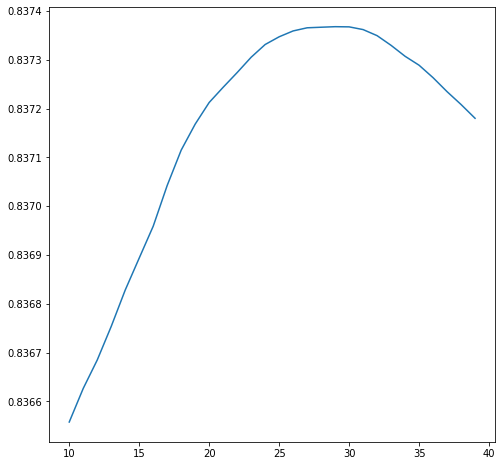

In [64]:
from matplotlib import pyplot as plt
plt.figure(figsize = (8,8))
plt.plot(alphas, scores)

In [65]:
las = Lasso(alpha = 30, max_iter=1000000)
pf = PolynomialFeatures(degree=2)
rs = RobustScaler()
estimator = Pipeline([("Polynomial",pf),("Scaler",rs),("Lasso", las)])
pred = cross_val_predict(estimator, X, y, cv = kf)
r2_score(y, cross_val_predict(estimator, X, y, cv =kf))

0.837367277739997

## ElasticNEt

In [91]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import ElasticNet
scalers = {'standars': StandardScaler(),
           'minmax': MinMaxScaler(),
           'robust':RobustScaler()}
LR = ElasticNet()
errors = {}
r2_scores = {}
for scaler_label, scaler in scalers.items():
  trainingset = scaler.fit_transform(X_train)
  testset = scaler.transform(X_test)
  LR.fit(trainingset, y_train)
  predictions = LR.predict(testset)
  key = scaler_label + 'Scaling'
  errors[key] = mean_squared_error(y_test, predictions)
  r2_scores[key] = r2_score(y_test, predictions)
errors = pd.Series(errors)
for key, val in errors.items():
  print(key, val)
for key, val in r2_scores.items():
  print(key, val)

standarsScaling 41318464.931991614
minmaxScaling 76458458.29431425
robustScaling 69552534.80681138
standarsScaling 0.689220903870258
minmaxScaling 0.42491351991679127
robustScaling 0.47685680152030385


In [77]:
las = ElasticNet()
pf = PolynomialFeatures(degree=2)
BestEstimator = Pipeline([("Polynomial",pf),("Lasso", las)])
BestEstimator.fit(X_train, y_train)
BestEstimator.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.117e+10, tolerance: 1.426e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.7949934364661837

In [82]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline
estimator = Pipeline([("Polynomial", PolynomialFeatures()),
                      ("Elastic", ElasticNet(max_iter=1000000))])
params = {
    "Elastic__alpha": [0.005,0.05,0.1,1,5,20,50,100,120,140]
    }
grid = GridSearchCV(estimator, params, cv = kf)
grid.fit(X, y)
print(grid.best_params_, grid.best_score_)

{'Elastic__alpha': 0.05} 0.8329939665415701


In [89]:
# alphas = np.geomspace(1e-9,1e0,num = 10)
alphas = [0.0005,0.005,0.05,0.5]
scores = []
coef = []
for alpha in alphas:
  las = ElasticNet(alpha=alpha, max_iter=1000000)
  estimator = Pipeline([("Polynomial", PolynomialFeatures()),
                      ("RobustScaler",RobustScaler()),
                      ("Lasso", las)])
  predictions = cross_val_predict(estimator, X, y, cv = kf)
  score = r2_score(y, predictions)
  scores.append(score)
  display(score)

0.8352234349241394

0.8359819753970104

0.8339045150710649

0.823847506524894

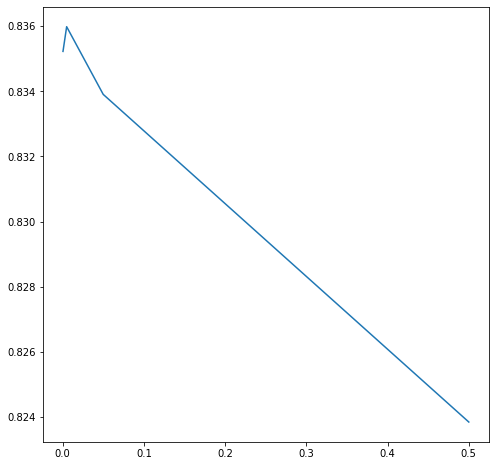

In [88]:
from matplotlib import pyplot as plt
plt.figure(figsize = (8,8))
plt.plot(alphas, scores)

In [92]:
ek = ElasticNet(alpha = 0.005, max_iter=1000000)
pf = PolynomialFeatures(degree=2)
rs = RobustScaler()
estimator = Pipeline([("Polynomial",pf),("Elastic", ek)])
pred = cross_val_predict(estimator, X, y, cv = kf)
r2_score(y, cross_val_predict(estimator, X, y, cv =kf))

0.8354538560738195

## Ridge regression

In [66]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import Ridge
scalers = {'standars': StandardScaler(),
           'minmax': MinMaxScaler(),
           'robust':RobustScaler()}
LR = Ridge()
errors = {}
r2_scores = {}
for scaler_label, scaler in scalers.items():
  trainingset = scaler.fit_transform(X_train)
  testset = scaler.transform(X_test)
  LR.fit(trainingset, y_train)
  predictions = LR.predict(testset)
  key = scaler_label + 'Scaling'
  errors[key] = mean_squared_error(y_test, predictions)
  r2_scores[key] = r2_score(y_test, predictions)
errors = pd.Series(errors)
for key, val in errors.items():
  print(key, val)
for key, val in r2_scores.items():
  print(key, val)

standarsScaling 37822065.32520359
minmaxScaling 37817732.090661205
robustScaling 37798433.721370555
standarsScaling 0.7155192649370227
minmaxScaling 0.7155518575978734
robustScaling 0.715697011339059


In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.pipeline import Pipeline
estimator = Pipeline([("Polynomial", PolynomialFeatures()),
                      ("RobustScaler",RobustScaler()),
                      ("Ridge", Ridge(max_iter=1000000))])
params = {
    "Ridge__alpha": [0.05,0.05,0.1,1,5,20,50,100,120,140]
    }
grid = GridSearchCV(estimator, params, cv = kf)
grid.fit(X, y)
print(grid.best_params_, grid.best_score_)

{'Ridge__alpha': 5} 0.8352183029598311


In [68]:
alphas = np.arange(0,15,1)
scores = []
coef = []
for alpha in alphas:
  Rid = Ridge(alpha=alpha, max_iter=1000000)
  estimator = Pipeline([("Polynomial", PolynomialFeatures()),
                      ("RobustScaler",RobustScaler()),
                      ("Ridge", Rid)])
  predictions = cross_val_predict(estimator, X, y, cv = kf)
  score = r2_score(y, predictions)
  scores.append(score)

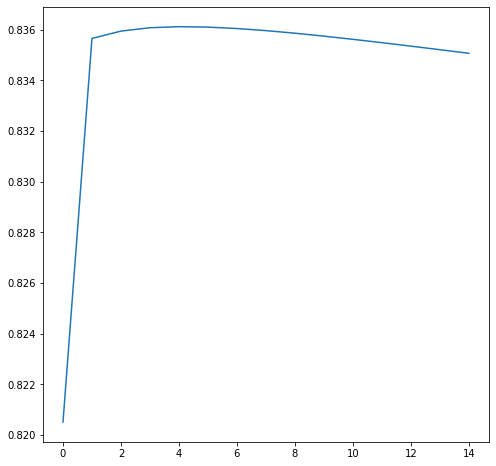

In [69]:
from matplotlib import pyplot as plt
plt.figure(figsize = (8,8))
plt.plot(alphas, scores)

In [70]:
rid = Ridge(alpha = 5, max_iter=1000000)
pf = PolynomialFeatures(degree=2)
rs = RobustScaler()
estimator = Pipeline([("Polynomial",pf),("Scaler",rs),("Ridge", rid)])
pred = cross_val_predict(estimator, X, y, cv = kf)
r2_score(y, cross_val_predict(estimator, X, y, cv =kf))

0.8360975785580597



> LinearRegression 0.8340521783293577

> LassoRegression - 0.837367277739997

> RidgeRegression - 0.8360975785580597

> ElasticNEt - 0.8354538560738195



So i will be selecting the LassoRegression model

## Feature Importance

In [71]:
las = Lasso(alpha = 30, max_iter=1000000)
pf = PolynomialFeatures(degree=2)
rs = RobustScaler()
BestEstimator = Pipeline([("Polynomial",pf),("Scaler",rs),("Lasso", las)])
BestEstimator.fit(X_train, y_train)

Pipeline(steps=[('Polynomial', PolynomialFeatures()),
                ('Scaler', RobustScaler()),
                ('Lasso', Lasso(alpha=30, max_iter=1000000))])

In [72]:
feature_info = pd.DataFrame(zip(BestEstimator.named_steps['Polynomial'].get_feature_names_out(input_features = X.columns),BestEstimator.named_steps['Lasso'].coef_))

In [73]:
feature_info.sort_values(by=1)

,0,1
54,sex_male region_southwest,-125.802421
38,children region_southeast,-105.639566
45,sex_female region_northwest,-48.637454
23,bmi^2,-34.174945
22,age smoker_yes,-30.378901
...,...,...
48,sex_female smoker_no,770.804855
19,age region_southeast,1078.269615
32,bmi smoker_yes,1303.083589
12,age^2,5232.353776
